# Berita_Online

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://news.detik.com/pemilu/d-7035258/maju-pilpres-2024-bareng-ganjar-mahfud-minta-doa-ke-gus-mus"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="detail__body-text itp_bodycontent")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).
Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.
"Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.
Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.
Tetapi doa itu tidak dimaksudkan untuk meminta dukungan, melainkan untuk kebaikan Bangsa Indonesia.
ADVERTISEMENT
















SCROLL TO CONTINUE WITH CONTENT

"Saya minta doa yang terbaik bagi bangsa dan negara Indonesia.
Saya tadi berdoa, ya berdoa bersama-sama, tetapi tidak ada urusan dukung-mendukung atau apa.
Yang didukung adalah kebaikan Indonesia sehingga doanya untuk Indonesia agar lebih baik, itu yang diminta kepada Allah tadi," ungkap Mahfud.Pertemuan dilakukan s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).
berkunjung: 0.2685
cawapres: 0.2685
di: 0.2053
ganjar: 0.2685
gus: 0.1421
jakarta: 0.2685
jateng: 0.2685
jawa: 0.2685
ke: 0.2053
kediaman: 0.2053
kelurahan: 0.2685
leteh: 0.2315
mahfud: 0.1543
md: 0.2315
mus: 0.1421
pranowo: 0.2685
rembang: 0.2315
tengah: 0.2685

Kalimat 2: Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.
bahwa: 0.3061
dirinya: 0.3549
gus: 0.1879
ikut: 0.3061
informasi: 0.3061
kepada: 0.2714
kontestasi: 0.3061
mahfud: 0.2040
memberi: 0.3061
mengaku: 0.3549
mus: 0.1879
politik: 0.3061

Kalimat 3: "Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.
gus: 0.2062
kan: 0.3894
ke: 0.2978
leteh: 0.3358
mus: 0.2062
rembang: 0.3358
saya: 0.2683
sering: 0.3894
sini: 0.3358
sowan: 0.3358

Kalimat 4: Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir de

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0849


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0849
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.2752
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1063
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0159
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0788
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1358
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.1295
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0775
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.4055
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0000
Cosine Similarity antara Ka

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13
Kalimat 1,1.000000,0.084888,0.275211,0.106291,0.000000,0.000000,0.000000,0.015875,0.078755,0.135756,0.129458,0.000000,0.0
Kalimat 2,0.084888,1.000000,0.077479,0.405504,0.000000,0.000000,0.000000,0.058147,0.062864,0.058156,0.081984,0.000000,0.0
Kalimat 3,0.275211,0.077479,1.000000,0.269889,0.000000,0.049908,0.047026,0.000000,0.043396,0.148449,0.041286,0.000000,0.0
Kalimat 4,0.106291,0.405504,0.269889,1.000000,0.028406,0.095720,0.072063,0.037302,0.098164,0.091193,0.077289,0.000000,0.0
Kalimat 5,0.000000,0.000000,0.000000,0.028406,1.000000,0.149988,0.109867,0.215404,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat 6,0.000000,0.000000,0.049908,0.095720,0.149988,1.000000,0.032607,0.128426,0.062780,0.000000,0.000000,0.000000,0.0
Kalimat 7,0.000000,0.000000,0.047026,0.072063,0.109867,0.032607,1.000000,0.033871,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat 8,0.015875,0.058147,0.000000,0.037302,0.215404,0.128426,0.033871,1.000000,0.011756,0.000000,0.022369,0.000000,0.0
Kalimat 9,0.078755,0.062864,0.043396,0.098164,0.000000,0.062780,0.000000,0.011756,1.000000,0.152981,0.045919,0.000000,0.0
Kalimat 10,0.135756,0.058156,0.148449,0.091193,0.000000,0.000000,0.000000,0.000000,0.152981,1.000000,0.063319,0.000000,0.0


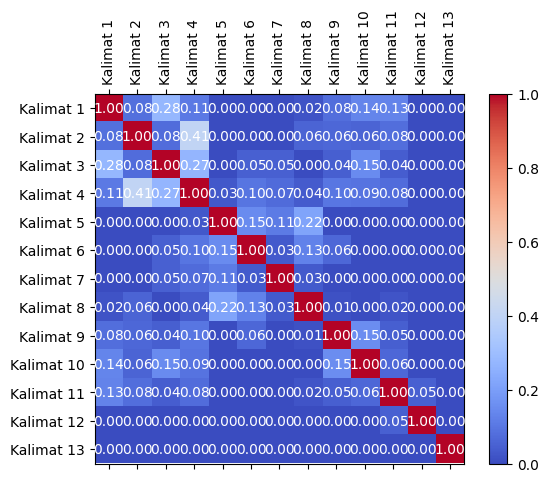

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).: 14.8059
Closeness Centrality of Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.: 10.3396
Closeness Centrality of "Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.: 12.7307
Closeness Centrality of Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.: 12.9134
Closeness Centrality of Tetapi doa itu tidak dimaksudkan untuk meminta dukungan, melainkan untuk kebaikan Bangsa Indonesia.: 9.4688
Closeness Centrality of ADVERTISEMENT
















SCROLL TO CONTINUE WITH CONTENT

"Saya minta doa yang terbaik bagi bangsa dan negara Indonesia.: 9.9243
Closeness Centrality of Saya tadi berdoa, ya berdoa bersam

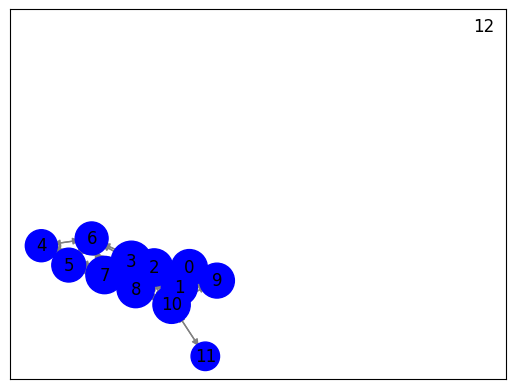

Closeness Centrality:
Node 0: 0.6722
Node 1: 0.6722
Node 2: 0.7202
Node 3: 0.8403
Node 4: 0.5307
Node 5: 0.5931
Node 6: 0.5602
Node 7: 0.7202
Node 8: 0.7202
Node 9: 0.6302
Node 10: 0.7202
Node 11: 0.4201
Node 12: 0.0000


In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


In [ ]:
#membangun sebuah graf yang merepresentasikan hubungan antara kalimat dalam teks berdasarkan kemiripan (similarity) antara kalimat-kalimat tersebut.
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).: 14.8059
Closeness Centrality of Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.: 10.3396
Closeness Centrality of "Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.: 12.7307
Closeness Centrality of Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.: 12.9134
Closeness Centrality of Tetapi doa itu tidak dimaksudkan untuk meminta dukungan, melainkan untuk kebaikan Bangsa Indonesia.: 9.4688
Closeness Centrality of ADVERTISEMENT
















SCROLL TO CONTINUE WITH CONTENT

"Saya minta doa yang terbaik bagi bangsa dan negara Indonesia.: 9.9243
Closeness Centrality of Saya tadi berdoa, ya berdoa bersam

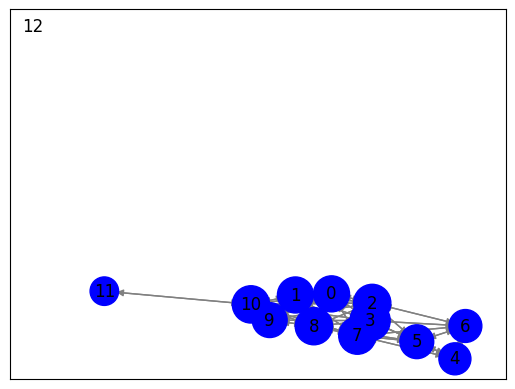

Closeness Centrality (Dari Tertinggi ke Terendah):
Node 3: Closeness Centrality 0.8403
Kalimat: Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.

Node 2: Closeness Centrality 0.7202
Kalimat: "Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.

Node 7: Closeness Centrality 0.7202
Kalimat: Yang didukung adalah kebaikan Indonesia sehingga doanya untuk Indonesia agar lebih baik, itu yang diminta kepada Allah tadi," ungkap Mahfud.Pertemuan dilakukan secara tertutup terpantau berlangsung selama satu jam lebih.

Node 8: Closeness Centrality 0.7202
Kalimat: Mahfud dan rombongan tiba pukul 18.32 WIB dan berpamitan pulang pukul 19.39 WIB.Dari luar kediaman Gus Mus, keduanya terdengar berbincang asyik.

Node 10: Closeness Centrality 0.7202
Kalimat: (dek/dek)


mahfud mahfud md gus mus pilpres 2024

In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
print("Closeness Centrality (Dari Tertinggi ke Terendah):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: Closeness Centrality {closeness:.4f}")
    print(f"Kalimat: {sentence}")
    print()

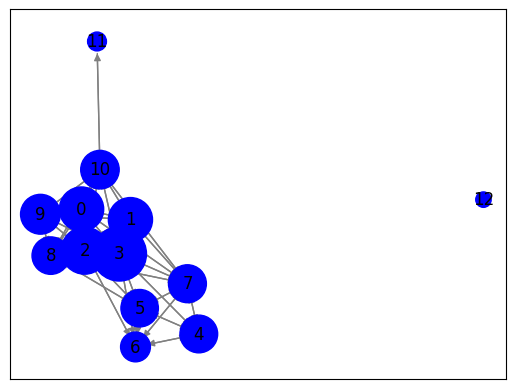

PageRank Centrality (Dari Tertinggi ke Terendah):
Node 3: PageRank Centrality 0.1527
Kalimat: Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.

Node 2: PageRank Centrality 0.1148
Kalimat: "Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.

Node 0: PageRank Centrality 0.1019
Kalimat: 
Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).

Node 1: PageRank Centrality 0.1010
Kalimat: Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.

Node 9: PageRank Centrality 0.0822
Kalimat: Sesekali terdengar tawa lepas dari dalam ruang tamu kediaman Gus Mus.Baca selengkapnya di sini.

Node 10: PageRank Centrality 0.0768
Kalimat: (dek/dek)


mahfud mahfud md gus mus pilpres 2024 



Pantau Pem

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j, weight=similarity)  # Gunakan similarity sebagai weight

# Hitung PageRank centrality
pagerank_centrality = nx.pagerank(G, weight='weight')

# Visualisasi PageRank centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 10000 for v in pagerank_centrality.values()]  # Ubah ukuran node berdasarkan PageRank, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak PageRank centrality dari yang tertinggi hingga terendah
print("PageRank Centrality (Dari Tertinggi ke Terendah):")
sorted_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

for node, pagerank in sorted_pagerank:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: PageRank Centrality {pagerank:.4f}")
    print(f"Kalimat: {sentence}")
    print()

In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 10: 0.1567
Node 3: 0.1125
Node 7: 0.0745
Node 2: 0.0518
Node 8: 0.0254
Node 5: 0.0161
Node 6: 0.0072
Node 0: 0.0052
Node 1: 0.0052
Node 4: 0.0000
Node 9: 0.0000
Node 11: 0.0000
Node 12: 0.0000


In [ ]:
# Cetak betweenness
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,10,0.156710,(dek/dek)\n\n\nmahfud mahfud md gus mus pilpre...
1,3,0.112518,Ya saya memberi informasi saja bahwa saya ikut...
2,7,0.074495,Yang didukung adalah kebaikan Indonesia sehing...
